<a href="https://colab.research.google.com/github/hanseul1215/ESAA_study/blob/master/handson_0321_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모델 훈련

## 4.1 선형 회귀

선형 회귀 모델 (벡터 형태)

- 세타 : 세타0(편향) ~ 세타n 까지의 특성 가중치를 담은 모델의 파라미터 벡터
- x : x0(1) ~ xn 까지의 샘플의 특성 벡터
- . : 점곱
- h세타 : 모델 파라미터 세타를 사용한 가설 함수 

회귀 성능 지표 (MSE)

###4.1.1 정규 방정식 
비용 함수를 최소화하는 세타 값을 찾기 위한 방법
- 세타햇: 비용 함수를 최소화하는 세타 값
- y: y(1) ~ y(m) 까지 포함하는 타깃 벡터


In [87]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

(0.0, 15.0)

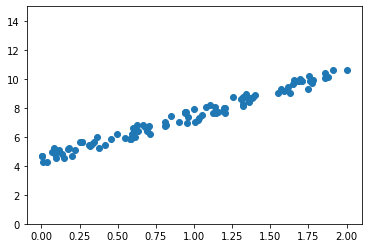

In [88]:
import matplotlib.pyplot as plt
plt.scatter(X, y, )
plt.ylim(0,15)

In [31]:
X_b = np.c_[np.ones((100,1)), X] # 모든 샘플에 x0 = 1을 추가
X_b.shape

(100, 2)

In [32]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best # 4와 3을 기대 했는데..

array([[4.56950533],
       [2.94889584]])

In [33]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.56950533],
       [10.467297  ]])

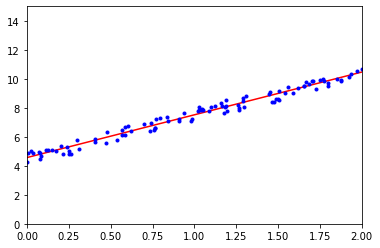

In [34]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [89]:
# 사이킷런 선형회귀
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(X_new)


[4.47641453] [[3.05134858]]


array([[ 4.47641453],
       [10.57911169]])

In [36]:
# LinearRegression 클래스의 scipy.linalg.lstsq() :  최소 제곱 해를 선형 행렬 방정식으로 반환
theta_best_svd, residuals, rank, s =  np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd 


array([[4.56950533],
       [2.94889584]])

- 세타햇 = 유사역행렬 X * y 계산

In [37]:
np.linalg.pinv(X_b).dot(y)

array([[4.56950533],
       [2.94889584]])

- 유사역행렬은 특잇값 분해(SVD)를 사용해 계산
- 정규 방정식 계산보다 훨씬 효율적, 극단적인 경우도 처리 가능

### 4.1.2 계산 복잡도
- 역행렬의 computational complexity는 일반적으로 O(n^2.4)~O(n^3) (n은 특성 수)

## 4.2 경사 하강법
비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것으로 파라미터 벡터 세타에 대해 비용 함수의 gradient를 계산하여 감소하는 방향으로 진행
- 세타를 임의의 값으로 시작함 (random initialization)
- 학습 스텝의 크기(->learning rate로 결정)는 기울기에 비례
- 반드시 모든 특성을 같은 스케일로 만들어야!
- 특성 수에 민감하지 않아


### 4.2.1 배치 경사 하강법
매 스텝에서 훈련 데이터 전체를 사용함
- 세타j에 대한 비용함수의 편도함수를 계산
- 경사 하강법의 스텝  
다음 단계 세타 = 세타 - 학습률 * 비용함수의 편도함수

In [38]:
eta = 0.1
n_iterations = 1000
m = 100 # 샘플 수 

theta = np.random.randn(2, 1) # random initializing

for iteration in range(n_iterations):
  gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [39]:
theta # 정규 방정식과 동일

array([[4.56950533],
       [2.94889584]])

적절한 학습률 찾기 위해 그리드 서치 사용  
-> 반복횟수 제한 필요  
-> 반복횟수 아주 크게하고 허용 오차보다 벡터의 노름이 작아지면 알고리즘 중지


### 4.2.2 확률적 경사 하강법
매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그래디언트를 계산  
-> 무작위성은 지역 최솟값을 탈출시킬 수 있지만 전역 최솟값에 다다르지 못 할 수 있음  
-> learning schedule을 통해 시작할 때 학습률을 크게 하고, 점차 작게 줄여서 보안하도록 하자

In [40]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0/ (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch*m + i)
    theta = theta - eta * gradients

In [41]:
theta # 50번 반복으로 좋은 값 도달

array([[4.55927948],
       [2.94887297]])

In [90]:
# 사이킷런 SGDRegressor: 제곱 오차 비용 함수를 최적화함 
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel()) # ravel : 넘파이 1차원 배열로 변경

SGDRegressor(eta0=0.1, penalty=None)

In [43]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.53554188]), array([2.9476528]))

### 4.2.3 미니배치 경사 하강법
임의의 작은 샘플 세트에 대해 gradient를 계산
- SGD보다 덜 불규칙하게

## 4.3 다항 회귀
각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터 셋에 선형 모델을 훈련시키는 것

In [44]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

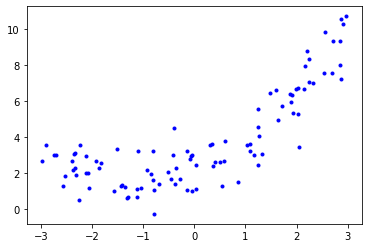

In [46]:
plt.plot(X, y, "b.")

In [91]:
# sklearn의 PolynomialFeatures로 훈련 데이터를 변환하자
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([0.81093014]), array([0.81093014, 0.65760769]))

- 훈련 세트에 있는 각 특성을 제곱해 새로운 특성으로 추가

In [50]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.19282967]), array([[1.08833279, 0.4896174 ]]))

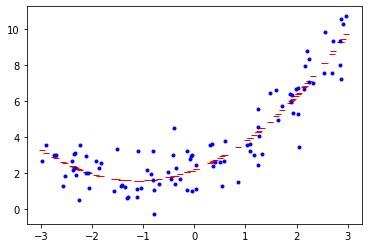

In [60]:
plt.plot(X, lin_reg.predict(X_poly), "r_")
plt.plot(X, y, "b.")

## 4.4 학습 곡선

복잡한 모델을 사용할 지 결정하는 법(일반화 성능 추정)  
-> 교차 검증  
-> 학습 곡선  
- 훈련 세트와 검증 세트의 모델 성능을 훈련 세트의 크기의 함수로 나타냄

In [99]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val" )


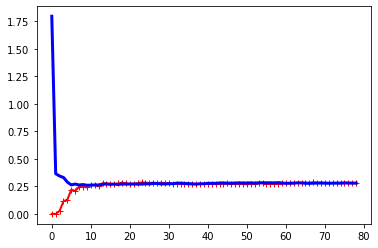

In [100]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

- 과소적합의 전형적인 그래프  
두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접

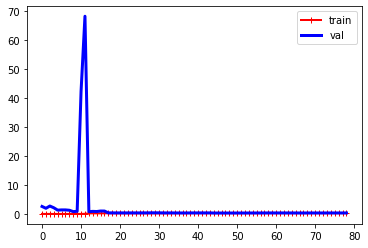

In [101]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
              ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
              ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)
plt.legend()
# 183 10차 다항회귀 학습곡선

- 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낫다  
- 훈련 데이터의 모델 성능이 검증 데이터보다 훨씬 좋다 -> 과대적합  
  
편향/ 분산 트레이드오프
- 편향: 일반화 오차 중에서 편향은 잘못된 가정으로 인한 것, 편향이 커 -> 과소적합
- 분산: 분산 커 -> 과대적합 
- 줄일 수 없는 오차 : 데이터의 잡음으로 인해 발생

## 4.5 규제가 있는 선형 모델
### 4.5.1 릿지 회귀 (l2)
- 규제항 : 알파 * 시그마 (세타 제곱)
- 규제항이 훈련하는 동안에만 비용 함수에 추가되고 훈련이 끝나면 모델의 성능을 규제항이 없는 성능 지표로 평가
- 알파는 모델을 얼마나 많이 규제할지 조절 

In [102]:
# 정규방정식을 사용한 릿지 회귀를 적용
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[9.00133382]])

In [103]:
# 확률적 경사 하강법 sgd
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([9.17916208])

###4.5.2 라쏘회귀(l1)
- 규제항: 알파 * 시그마 * |세타|
- 덜 중요한 특성의 가중치를 제거하려는 점이있음 -> sparse model 만듦
- 미분 불가점에 서브그레이디언트 벡터를 사용하면 경사 하강법 적용하면 문제 없음

In [104]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([8.87737241])

### 4.5.3 엘라스틱넷
- 규제항: 릿지, 라쏘 회귀의 규제항을 단순히 더하며, 혼합 정도는 r(혼합 비율)을 사용해 조절 
- r=0 -> 릿지 회귀, r=1 -> 라쏘회귀

언제 사용?
- 쓰이는 특성 수가 적으면 라쏘, 엘라스틱 넷
- 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통 엘라스틱넷

In [105]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([8.74477162])

###4.5.4 조기 종료
검증 에러가 최소에 도달하는 즉시 훈련을 멈춤

In [108]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
poly_scaler = Pipeline([
                   ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
                   ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, # warm_start=True: fit() 메서드가 호출될 때 이전 모델 파라미터에서 훈련을 이어간다.
                       penalty=None, learning_rate='constant', eta0=0.0005)
minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train) # 훈련을 이어서 진행합니다.
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

## 4.6 로지스틱 회귀
샘플이 특정 클래스에 속할 확률을 측정
### 4.6.1 확률 추정  
- 0~1 사이 값을 출력하는 시그모이드 함수로 확률 추정  

### 4.6.2 훈련과 비용 함수
- 로그 손실 함수  
볼록 함수로 경사 하강법이 전역 최솟값을 찾는 것을 보장  

### 4.6.3 결정 경계



In [110]:
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))

X = iris['data'][:,3:] # 꽃잎의 너비
y = (iris['target']==2).astype(np.int64) # 1 Iris-Virginica면 1, 그렇지 않으면 0

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [111]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

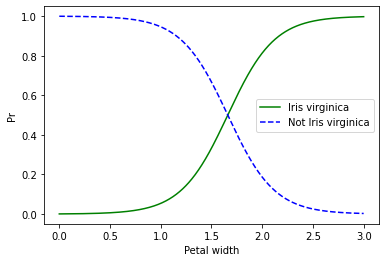

In [117]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:,0], 'b--', label='Not Iris virginica')
plt.xlabel("Petal width")
plt.ylabel("Pr")
plt.legend()

In [118]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

- 사이킷런 로지스틱회귀 규제강도 조절 파라미터는 C
- C가 높을수록 규제 줄어
### 4.6.4 소프트맥스 회귀(다항 로지스틱 회귀)
다중 클래스(multiclass) 지원하는 함수
- 추정 확률이 가장 높은 클래스를 선택
- 한 번에 하나의 클래스만 예측  

크로스 엔트로피 비용 함수
- 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제


In [119]:
X = iris['data'][:,(2,3)] # 꽃잎 길이, 꽃잎 너비
y = iris['target']
# multi_class 매개변수를 multinomial로 바꾸어 소프트맥스 회귀 사용
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10) # C: 규제 강도
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [120]:
softmax_reg.predict([[5,2]])

array([2])

In [122]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])